# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Hojo, Hiroshi\
_Student No._: 202201830\
_Section_:TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Hiroshi Hojo (SGD.)

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

In [ ]:
from numpy import arange, array  #Importing functions for array creation and numerical ranges
from pylab import plot, xlabel, ylabel, show, legend, title  #Importing functions for plotting and labeling

#Define the system of differential equations (Lotka-Volterra Predator-Prey Model)
def f(r, t):
    x = r[0]  #Population of prey (e.g., rabbits)
    y = r[1]  #Population of predator (e.g., foxes)
    
    #Model parameters
    A = 1.0  #Growth rate of prey
    B = 0.5  #Rate at which predators consume prey
    g = 0.5  #Rate at which predators increase by consuming prey
    S = 2    #Natural death rate of predators

    #Differential equations for prey (fx) and predator (fy)
    fx = A * x - B * x * y  #Change in prey population
    fy = g * x * y - S * y  #Change in predator population
    
    #Return the rate of change as an array
    return array([fx, fy], float)

#Time range and step size for simulation
a = 0.0     #Start time
b = 30.0    #End time
N = 1000    #Number of steps
h = (b - a) / N  #Time step size

#Create an array of time points
tpoints = arange(a, b, h)

#Lists to store prey and predator populations over time
xpoints = []
ypoints = []

#Initial populations of prey and predator
r = array([2.0, 2.0], float)  #[prey, predator]

#Runge-Kutta method (RK4) to solve the system of differential equations
for t in tpoints:
    xpoints.append(r[0])  #Store prey population at time t
    ypoints.append(r[1])  #Store predator population at time t
    
    #Compute the four Runge-Kutta terms (k1, k2, k3, k4)
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    
    #Update the population vector r using the weighted average of k1, k2, k3, k4
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

#Plot the prey population over time
plot(tpoints, xpoints, label='rabbit')

#Plot the predator population over time
plot(tpoints, ypoints, label='fox')
title('mathematical model of predator-prey interactions')
#Label the x-axis (time)
xlabel("time")

#Display the legend for the plot
legend()

#Show the plot
show()


The graph illustrates the predator-prey interaction modeled by the Lotka-Volterra equations, where the blue curve represents the rabbit (prey) population and the orange curve represents the fox (predator) population. The oscillatory nature of the curves shows cyclic behavior: as the rabbit population increases, the fox population rises after a short delay due to the abundance of food. However, as the fox population grows, they consume more rabbits, causing the prey population to decline. This eventually leads to a reduction in the fox population as their food source diminishes. As the predator population drops, the rabbits have a chance to recover, and the cycle begins again.

### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


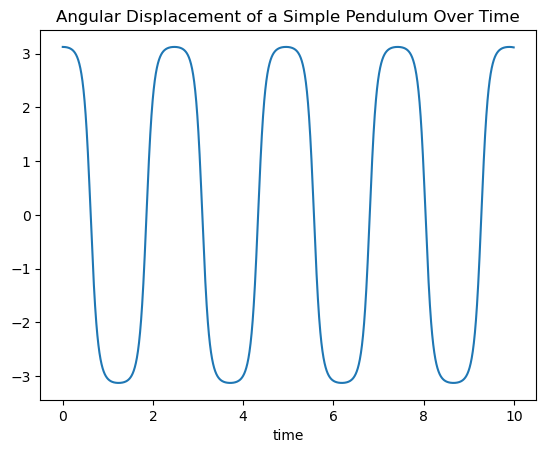

In [4]:
from math import sin, pi  #Importing sine function and pi constant from math module
from numpy import arange, array  #Importing functions for creating arrays and numerical ranges
from pylab import plot, xlabel, ylabel, show, title  #Importing plotting functions

#Physical constants
g = 9.81  #Gravitational acceleration (m/s^2)
l = 0.1   #Length of the pendulum (meters)

#Define the system of differential equations for a simple pendulum
def f(r, t):
    θ = r[0]  #Angle of the pendulum (in radians)
    w = r[1]  #Angular velocity (rate of change of angle)
    
    #Differential equations for the pendulum system
    fθ = w  #dθ/dt = w (angular velocity)
    fw = -(g / l) * sin(θ)  #dw/dt = -(g/l)*sin(θ) (angular acceleration)
    
    #Return the rate of change as an array
    return array([fθ, fw], float)

#Time range and step size for simulation
a = 0.0      #Start time (seconds)
b = 10.0     #End time (seconds)
N = 3000     #Number of time steps
h = (b - a) / N  #Time step size

#Create an array of time points for the simulation
tpoints = arange(a, b, h)

#List to store the angle θ (pendulum's angular position) over time
θ = []

#Initial conditions: [initial angle (in radians), initial angular velocity]
r = array([179 / 180 * pi, 0.0], float)  #Start with the pendulum nearly vertical (just below 180°)

#Runge-Kutta method (RK4) to solve the system of differential equations
for t in tpoints:
    θ.append(r[0])  #Store the current angle of the pendulum at time t
    
    #Compute the four Runge-Kutta terms (k1, k2, k3, k4)
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    
    #Update the state vector r using the weighted average of k1, k2, k3, k4
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

#Plot the angular position (θ) of the pendulum over time
plot(tpoints, θ)
title('Angular Displacement of a Simple Pendulum Over Time')

#Label the x-axis (time)
xlabel("time")

#Display the plot
show()


The graph represents the angular displacement of a non-linear pendulum over time, demonstrating periodic oscillations, though these are more complex than simple harmonic motion. Unlike a linear (small-angle) approximation, the non-linear pendulum accounts for large angular displacements, which result in more complex dynamics. The pendulum swings back and forth, with the angular displacement 𝜃 oscillating between positive and negative values, reflecting its motion under gravity.

The graph still shows periodic motion, but because it's a non-linear system, the motion is not perfectly sinusoidal, especially at larger angles. The pendulum’s amplitude reaches close to ±𝜋 radians (about 180 degrees), as specified by the initial conditions, meaning the pendulum swings close to an inverted position. In a non-linear pendulum, the restoring force is proportional to the sine of the angular displacement sin(𝜃), not the angle itself. This makes the period of oscillation slightly dependent on the amplitude, though the period remains nearly constant for moderate angles.